In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import librosa
from librosa import display as dsp
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
soundFilesList=os.listdir('/content/drive/MyDrive/Colab Notebooks/GuitarNotes')

In [ ]:
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

soundLabel=[]
soundData=[]
rawData=[]
baseDir='/content/drive/MyDrive/Colab Notebooks/GuitarNotes/'
mfccSingularList=list()
for file in soundFilesList:
    filename = str.split(file,'.')[0]
    tempAudioData=list()
    audioData,sampleRate=librosa.core.load(baseDir+file,res_type='kaiser_fast')
    rawData.append(audioData)
    spectralData=librosa.feature.spectral_bandwidth(y=audioData,sr=sampleRate)
    for sd in spectralData:
        tempAudioData.append(sd)
    soundData.append(tempAudioData)
    soundLabel.append(filename)

    tempAudioData1=list()
    augmentedData1 = manipulate(audioData, 0.0001)
    rawData.append(augmentedData1)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData1,sr=sampleRate)
    for sd in spectralData:
        tempAudioData1.append(sd)
    soundData.append(tempAudioData1)
    soundLabel.append(filename)

    tempAudioData2=list()
    augmentedData2 = manipulate(audioData, 0.00001)
    rawData.append(augmentedData2)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData2,sr=sampleRate)
    for sd in spectralData:
        tempAudioData2.append(sd)
    soundData.append(tempAudioData2)
    soundLabel.append(filename)

    tempAudioData3=list()
    augmentedData3 = manipulate(audioData, 0.00002)
    rawData.append(augmentedData3)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData3,sr=sampleRate)
    for sd in spectralData:
        tempAudioData3.append(sd)
    soundData.append(tempAudioData3)
    soundLabel.append(filename)

    tempAudioData4=list()
    augmentedData4 = manipulate(audioData, 0.000004)
    rawData.append(augmentedData4)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData4,sr=sampleRate)
    for sd in spectralData:
        tempAudioData4.append(sd)
    soundData.append(tempAudioData4)
    soundLabel.append(filename)    
    
    tempAudioData5=list()
    augmentedData5 = manipulate(audioData, 0.000013)
    rawData.append(augmentedData5)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData5,sr=sampleRate)
    for sd in spectralData:
        tempAudioData5.append(sd)
    soundData.append(tempAudioData5)
    soundLabel.append(filename)

    tempAudioData6=list()
    augmentedData6 = manipulate(audioData, 0.000053)
    rawData.append(augmentedData6)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData6,sr=sampleRate)
    for sd in spectralData:
        tempAudioData6.append(sd)
    soundData.append(tempAudioData6)
    soundLabel.append(filename)

    tempAudioData7=list()
    augmentedData7 = manipulate(audioData, 0.0003)
    rawData.append(augmentedData7)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData7,sr=sampleRate)
    for sd in spectralData:
        tempAudioData7.append(sd)
    soundData.append(tempAudioData7)
    soundLabel.append(filename)

    tempAudioData8=list()
    augmentedData8 = manipulate(audioData, 0.00009)
    rawData.append(augmentedData8)
    spectralData=librosa.feature.spectral_bandwidth(y=augmentedData8,sr=sampleRate)
    for sd in spectralData:
        tempAudioData8.append(sd)
    soundData.append(tempAudioData8)
    soundLabel.append(filename)


print('Done')

Done


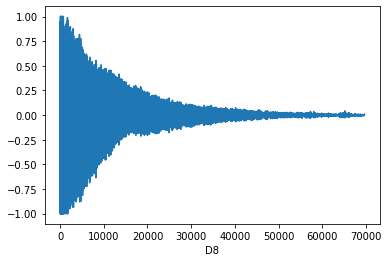

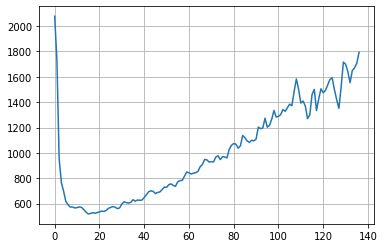

In [ ]:
idx=np.random.randint(len(soundData))

plt.plot(rawData[idx])
plt.xlabel(soundLabel[idx])
plt.show()
plt.plot(soundData[idx][0])
plt.grid()
plt.show()


In [ ]:
X=[]
for s in soundData:
    for val in s:
        X.append(val)

In [ ]:
print(max([len(x) for x in X]))
maxlen=max([len(x) for x in X])
X=pad_sequences(X,maxlen=maxlen)
np.shape(X)
print(len(soundLabel))

154
558


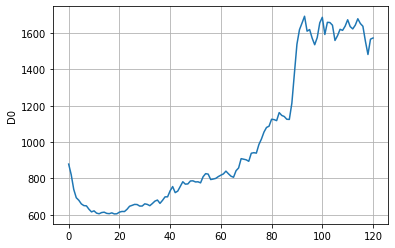

In [ ]:
idx=np.random.randint(len(X))
plt.plot(soundData[idx][0])
plt.ylabel(soundLabel[idx])
plt.grid()
plt.show()

In [ ]:
np.shape(X)

(558, 154)

In [ ]:
num_classes=len(set(soundLabel))
num_classes

62

In [ ]:
targetLabelEncoder=LabelEncoder()
y=targetLabelEncoder.fit_transform(soundLabel)
#X=X.reshape(X.shape[0],X.shape[1],1)
#y=to_categorical(y=target,num_classes=num_classes)
#input_shape=(X.shape[1],1)

In [ ]:
np.shape(X),np.shape(y)

((558, 154), (558,))

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=43)
mlpClf=MLPClassifier(hidden_layer_sizes = (120, 60, 90), random_state=1)
print(mlpClf.get_params())
mlpClf.fit(X_train, y_train)
print('Accuracy:', mlpClf.score(X_test,y_test))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (120, 60, 90), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Accuracy: 0.8303571428571429


In [ ]:
idx=np.random.randint(len(X_test))
print('Pred:',targetLabelEncoder.inverse_transform(mlpClf.predict([X_test[idx]]))[0])
print('Actual:',targetLabelEncoder.inverse_transform(y_test)[idx])

Pred: (Scale6) La
Actual: A8
